In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("C:/Users/navji/Downloads/Projects/housing.csv")
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
#applying dummies to get the new binary columns based on the categorical column
dummies = pd.get_dummies(df['ocean_proximity'])
df = pd.concat([df, dummies], axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,0,1,0,0,0


In [4]:
#df.info()
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
#df.dropna(inplace=True)


In [5]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['median_house_value'], axis=1)
y = df['median_house_value']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
train = x_train.join(y_train)
#test = x_test.join(y_test)
#test

In [8]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
7172,-118.18,34.05,52,1070,231.0,925,220,1.8250,<1H OCEAN,1,0,0,0,0,133000
16405,-121.20,38.02,44,608,108.0,287,83,3.3882,INLAND,0,1,0,0,0,125000
19306,-122.77,38.33,32,2054,324.0,843,306,4.5875,<1H OCEAN,1,0,0,0,0,290700
15654,-122.40,37.79,52,1185,660.0,1007,623,1.4552,NEAR BAY,0,0,0,1,0,450000
6308,-118.01,34.05,37,682,172.0,813,173,3.8125,<1H OCEAN,1,0,0,0,0,138000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,-118.24,34.20,41,2067,452.0,1282,455,5.5756,<1H OCEAN,1,0,0,0,0,309900
8857,-118.39,34.07,45,3143,553.0,1153,564,5.7762,<1H OCEAN,1,0,0,0,0,500001
5599,-118.27,33.79,36,2218,561.0,1789,527,3.1613,<1H OCEAN,1,0,0,0,0,182300
10052,-121.04,39.19,17,856,167.0,518,170,3.5859,INLAND,0,1,0,0,0,144300


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

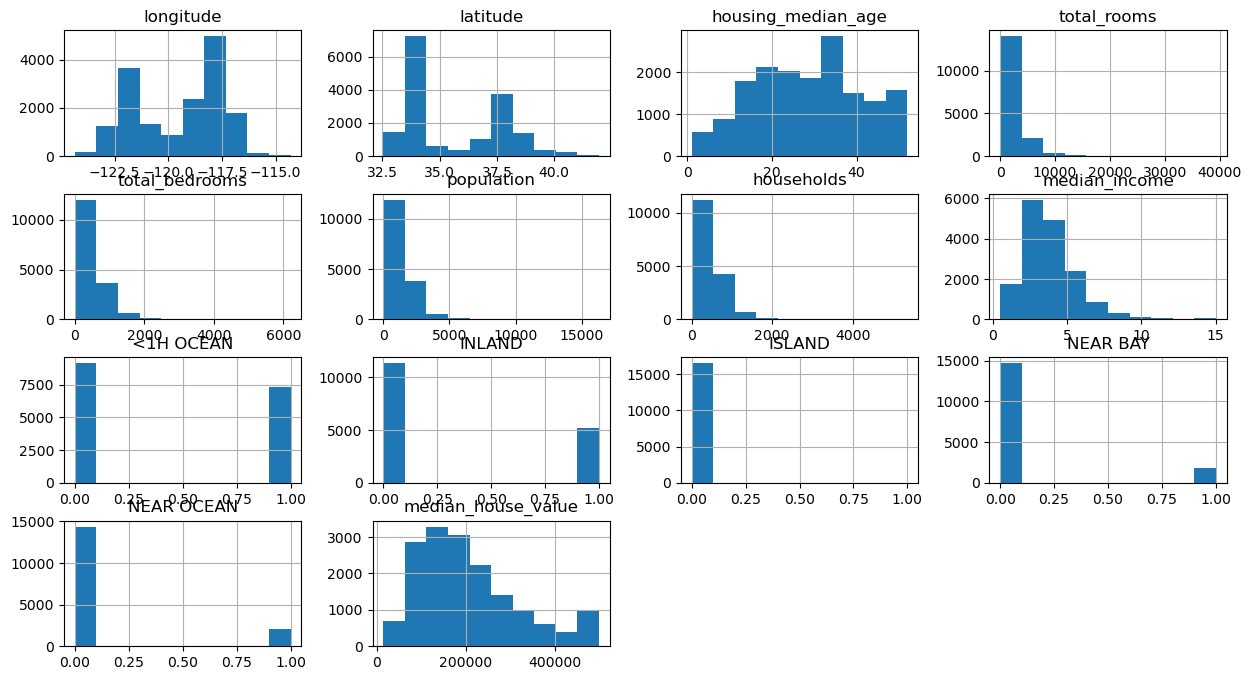

In [9]:
train.hist(figsize=(15, 8))
#THIS IS IMPORTANT TO UNDERSTAND IF ALL DATA VALUES ARE SKEWED OR NOT

C:\Users\navji\AppData\Local\Temp\ipykernel_28344\1232827285.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap="Reds")


<Axes: >

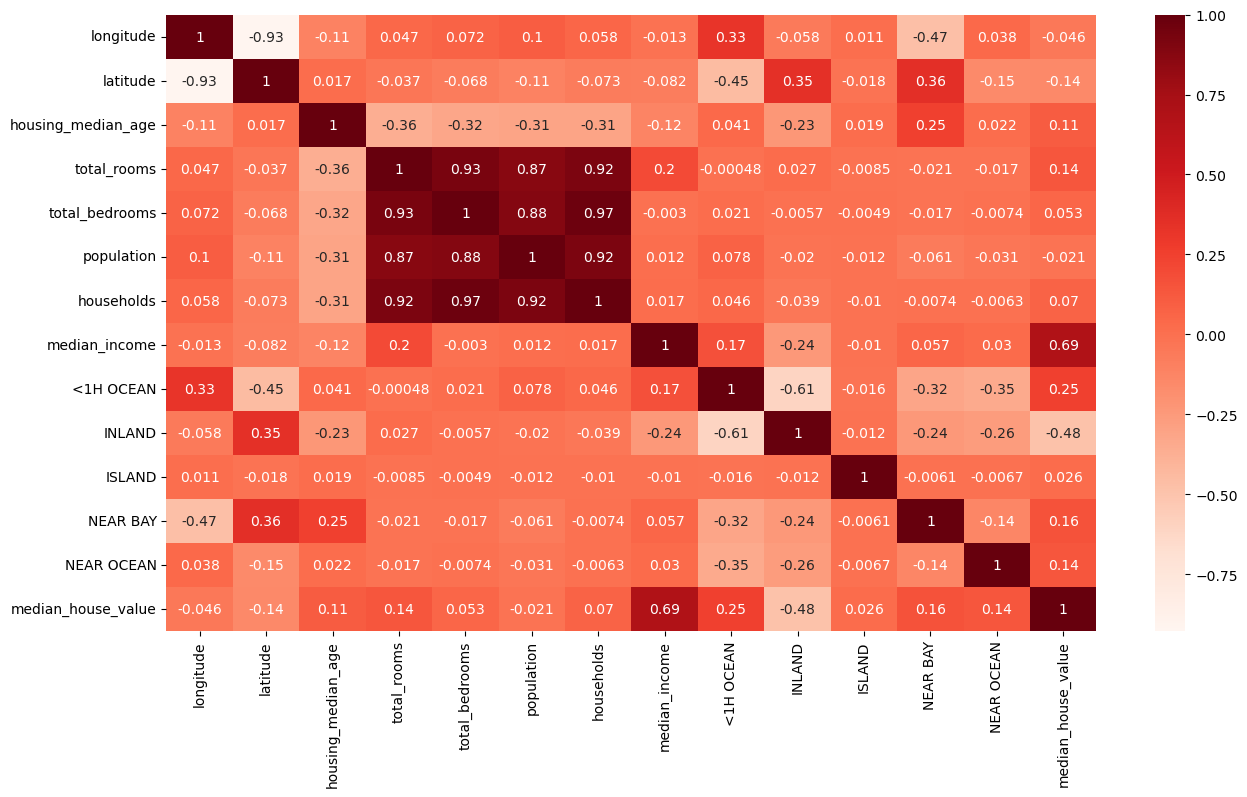

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True, cmap="Reds")

In [11]:
#Here we are adding a constant of 1 to reduce right skew(data is all the way on the left)
#By applying np.log(logarithm) this reduces the skew of data to all columns and makes it more gaussian
train['total_rooms'] = np.log(train['total_rooms'] + 1)
train['total_bedrooms'] = np.log(train['total_bedrooms'] + 1)
train['population'] = np.log(train['population'] + 1)
train['households'] = np.log(train['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

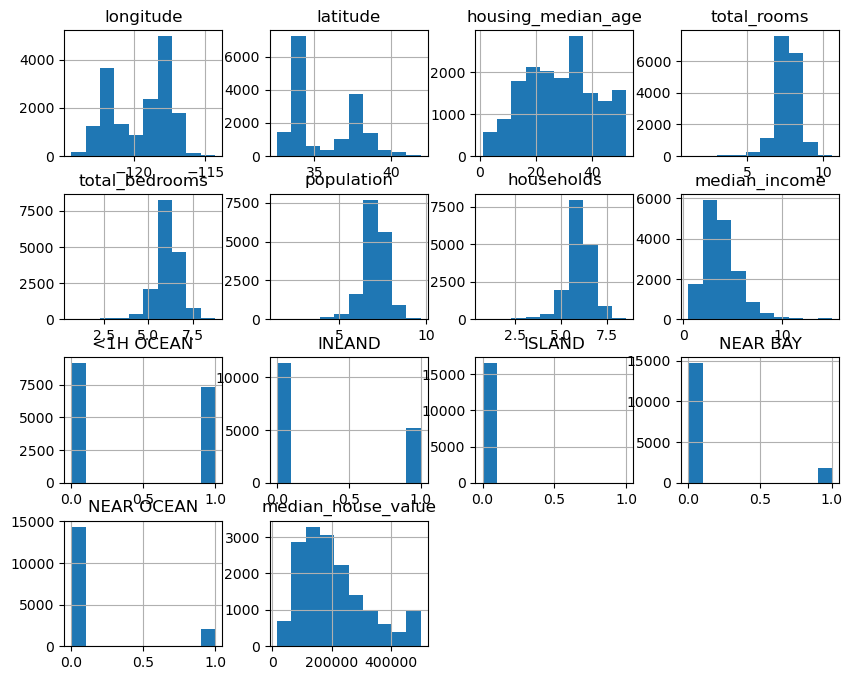

In [12]:
train.hist(figsize=(10, 8))

<Axes: xlabel='latitude', ylabel='longitude'>

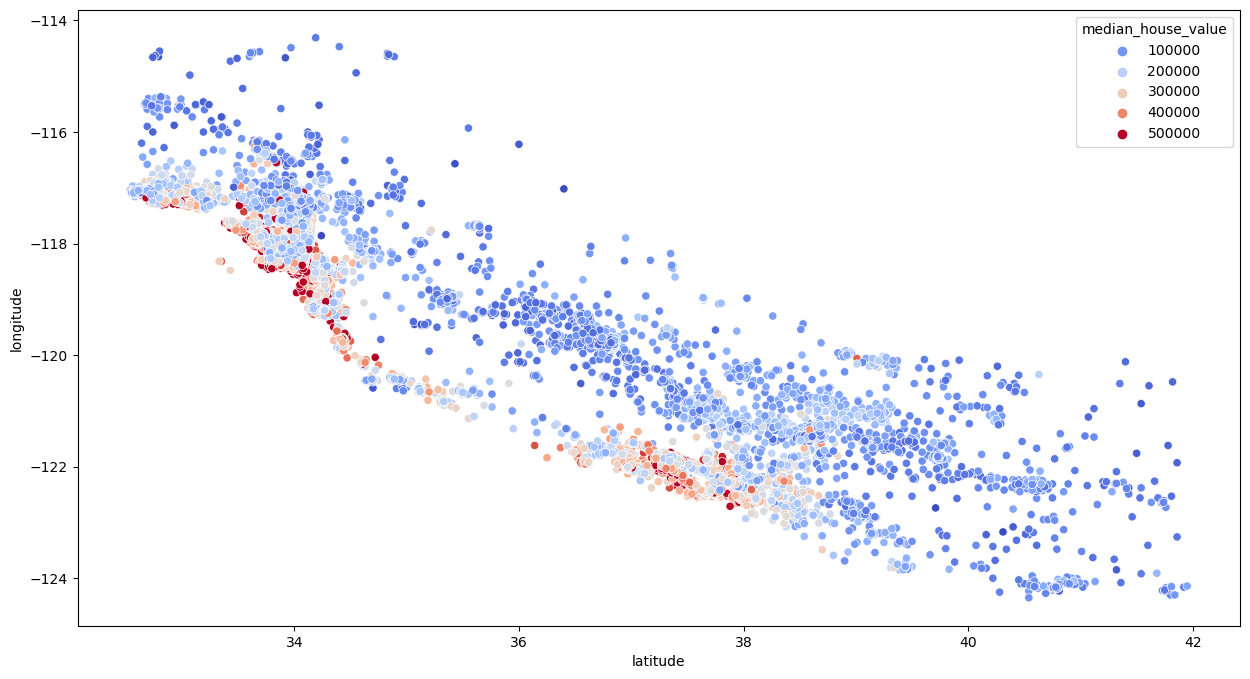

In [14]:
# SCATTERPLOT
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train, hue="median_house_value", palette="coolwarm")

In [15]:
# FEATURE ENGINEERING (CREATING OR REDUCING DIMENSIONALITY)
train['bedroom_ratio'] = train['total_bedrooms'] / train['total_rooms']
train['household_rooms'] = train['total_rooms'] / train['households']

C:\Users\navji\AppData\Local\Temp\ipykernel_28344\1232827285.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap="Reds")


<Axes: >

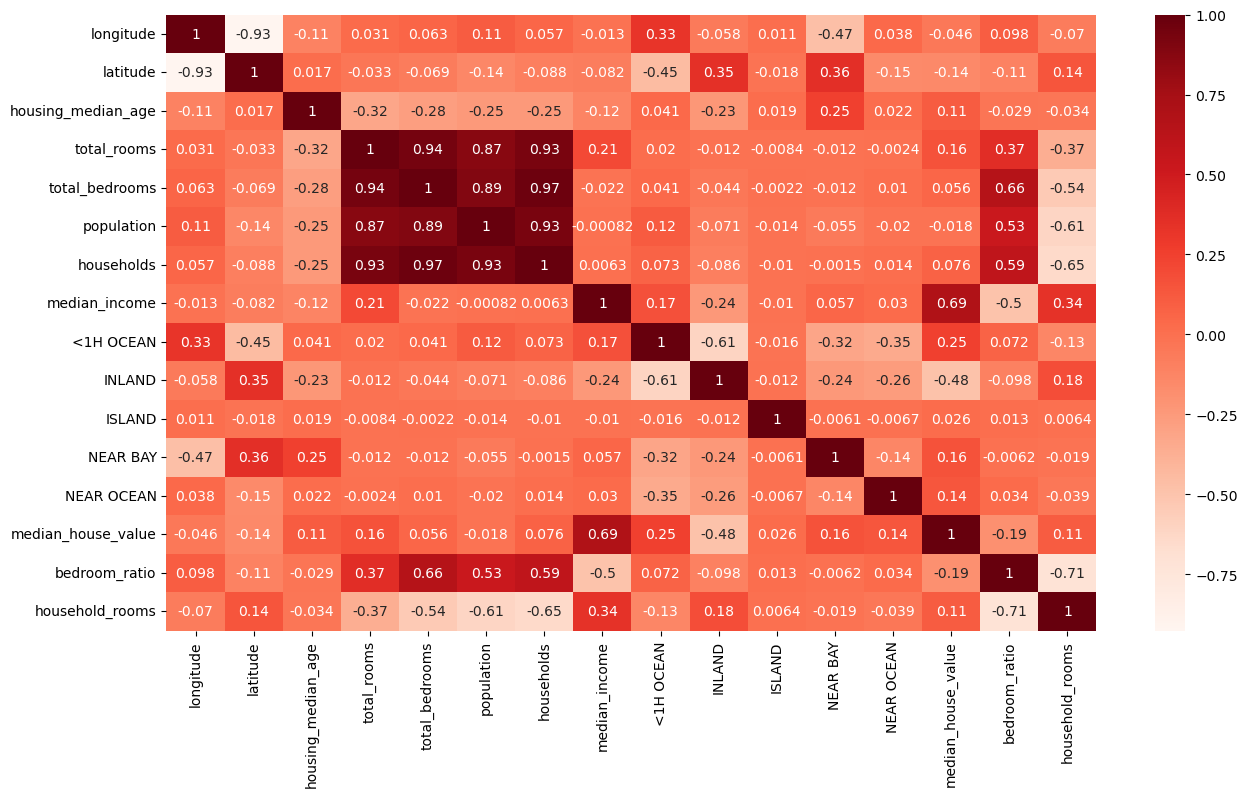

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True, cmap="Reds")

In [ ]:
#fgdfgdfgblahlh